# Fourier-Transformation {#sec-fourier}

[Aufgabenstellung](calculations/EMS_%C3%9Cbung_6.pdf)

## Unterspannter Balken mit periodischer Anregung

![Statisches System](pictures/ems6.jpg){#fig-statisch_system}

In [1]:
import sympy as sp 
from sympycalcs import render, convert
import sympy.physics.units as unit

import matplotlib.pyplot as plt

## Parameter der Aufgabenstellung

In [2]:
params = {'E': 200000 *unit.N/unit.mm**2,
          'I_Balken':2*10**8 *unit.mm**4,
          'A_Fachwerk':3000*unit.mm**2,
          'm_':1000*unit.N*unit.second**2/unit.m,
          'A':1*10**3*unit.N,
          'l':5*unit.m,
          'h':2*unit.m,
          'zeta':0.0,
          }

render.dict_render(params)

Eq(E, 200000*newton/millimeter**2)

Eq(I_Balken, 200000000*millimeter**4)

Eq(A_Fachwerk, 3000*millimeter**2)

Eq(m_, 1000*newton*second**2/meter)

Eq(A, 1000*newton)

Eq(l, 5*meter)

Eq(h, 2*meter)

Eq(zeta, 0.0)

In [3]:
omega, t, E, I_Balken, A_Fachwerk, m_, A, l, h, zeta = sp.symbols('omega, t, E, I_Balken, A_Fachwerk, m_, A, l, h, zeta')

## Erregerfunktion

Die periodische Erregerfunktion wird mit einer Fourier-Reihenentwicklung approximiert um eine periodisch, harmonische Funktion zu generieren.

Die Reihenentwicklung folgt folgender Funktion:

$$F(t) = A_0 + \sum_{n=1}^{\infty}(a_n*\cos{(n\omega t)}+b_n*\sin{(n\omega t)})$$

Die Aufgabenstellung fordert lediglich die ersten drei Teile der Reihe.

$$F(t) = A_0 + \sum_{n=1}^{3}(a_n*\cos{(n\omega t)}+b_n*\sin{(n\omega t)})$$

Nach Bestimmung der Konstanten folgt die Gleichung zu:

$$F(t) = \frac{4A}{\pi} *[\sin(\omega t) + \frac{1}{3}\sin(3\omega t) + \frac{1}{5}\sin(5 \omega t)]$$

In [4]:
f_Anregung = 1/unit.seconds
omega = f_Anregung * 2*sp.pi

F_t = 4*A/ sp.pi * (sp.sin(omega*t)+sp.Rational(1,3)*sp.sin(3*omega *t)+ sp.Rational(1,5)*sp.sin(5*omega*t))


render.eq_display('f_Anregung', f_Anregung,
                  'omega', omega.subs(params).evalf(3),
                  'F(t)', F_t)

Eq(f_Anregung, 1/second)

Eq(omega, 6.28/second)

Eq(F(t), 4*A*(sin(2*pi*t/second) + sin(6*pi*t/second)/3 + sin(10*pi*t/second)/5)/pi)

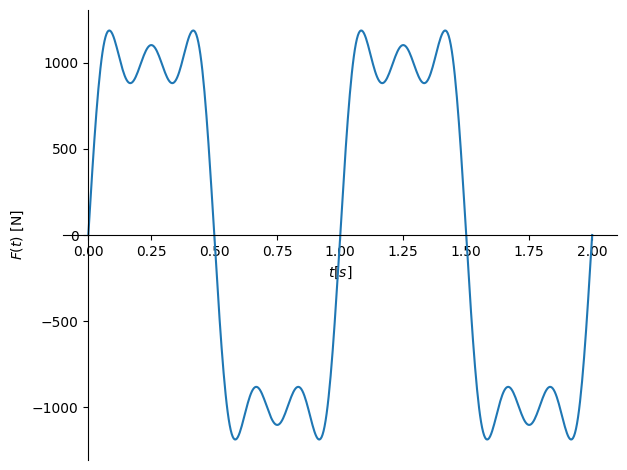

In [5]:
#| label: fig-anregung_fourier
#| fig-cap: "Anregungsfunktion mit Fourier-Reihe approximiert"
params_plot = convert.param_value(params)

F_t_plot = F_t.subs(params_plot).subs(unit.second, 1)

sp.plot(F_t_plot, (t,0,2), adaptive=False, nb_of_points=500,
        xlabel='$t [s]$',
        ylabel='$F(t)$ [N]')
plt.show()


## Systemsteifigkeit

Anhand der Arbeitsgleichung wird die Deformation bestimmt und daraus die Steifigkeit des Systems. Auf die Bestimmung der Schnittgrössen wird nicht eingegangen. Es handelt sich um ein statisch unbestimmtes System.

![Schnittgrössen des unterspannten Balkens](pictures/schnittgr%C3%B6ssen.jpg){#fig-schnittgroessen}

Da der Balken dehnstarr ist und die Unterspannung aus Pendelstäben zusammengesetzt ist, sind Anteile aus Normalkraft aus den Pendelstäben und lediglich Anteile aus Biegung im Balken für die Deformation zuständig.

In [6]:
u_for_k_balken = 1/3 * 0.163*10**6*unit.N*unit.mm * 0.163 *unit.m* 2*l / (E*I_Balken) 
u_for_k_fachwerk = (1*-0.935*10**3*unit.N*-0.935 * h + 2*1.258*10**3*unit.N*1.258*sp.sqrt(h**2+l**2))/(E*A_Fachwerk)

u_for_k = u_for_k_balken + u_for_k_fachwerk
k = 1000*unit.N / u_for_k

render.eq_display('u_k', unit.convert_to(u_for_k.subs(params).simplify().evalf(3),unit.mm),
                  'k', k.subs(params).simplify().evalf(3))


Eq(u_k, 0.0335*millimeter)

Eq(k, 2.98e+7*newton/meter)

## Eigenkreisfrequenz


Aus der Systemsteifigkeit lässt sich leicht die Eigenkreisfrequenz bestimmen:

$$\omega_n =\sqrt{\frac{k}{m}}$$

In [7]:
omega_n = sp.sqrt(k/m_)

render.eq_display('omega_n', omega_n.subs(params).simplify().evalf(3))

Eq(omega_n, 173.0/second)

## Stationäre Amplitude der Verschiebung

Die statische Durchbiegung lässt sich anhand der Systemsteifigkeit und der Anfangskraft der Anregungsfunktion bestimmen. Mittels des Vergrösserungsfaktors lässt sich schlussendlich die stationäre maximale Amplitude bestimmen. Der Vergrösserungsfaktor ist abhängig von der Anregungsfrequenz, welche wir mit der Fourier-Reihenentwicklung approximiert haben. Wir haben folglich *"3 verschiedene"* Anregungsfrequenzen mit der entsprechenden Gewichtung.

In [8]:
u_0 = 4*A/sp.pi /k

V_omega = 1/(sp.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2)) + 1/(sp.sqrt((1-(3*omega/omega_n)**2)**2 + (2*zeta*(3*omega/omega_n))**2))/3 + 1/(sp.sqrt((1-(5*omega/omega_n)**2)**2 + (2*zeta*(5*omega/omega_n))**2))/5


render.eq_display('V(omega)', '1/(sqrt((1-(omega/omega_n)**2)**2 + (2*zeta_*(omega/omega_n))**2)) + 1/(sqrt((1-(3*omega/omega_n)**2)**2 + (2*zeta_*(3*omega/omega_n))**2))/3 + 1/(sqrt((1-(5*omega/omega_n)**2)**2 + (2*zeta_*(5*omega/omega_n))**2))/5',
                  'V(omega)', V_omega.subs(params).simplify().evalf(3))

u_stat = u_0 * V_omega

render.eq_display('u_0', unit.convert_to(u_0.subs(params).simplify().evalf(3),
 unit.mm),
 'u_stat', unit.convert_to(u_stat.subs(params).simplify().evalf(3), unit.mm))

Eq(V(omega), 1/(5*sqrt(100*omega**2*zeta_**2/omega_n**2 + (-25*omega**2/omega_n**2 + 1)**2)) + 1/(3*sqrt(36*omega**2*zeta_**2/omega_n**2 + (-9*omega**2/omega_n**2 + 1)**2)) + 1/sqrt(4*omega**2*zeta_**2/omega_n**2 + (-omega**2/omega_n**2 + 1)**2))

Eq(V(omega), 1.55)

Eq(u_0, 0.0427*millimeter)

Eq(u_stat, 0.066*millimeter)

Der Vergrösserungsfaktor ist erwartungsgemäss niedrig, da sich die Eigenkreisfrequenz deutlich von der Anregungsfrequenz abgrenzt. 

## Stationäre Amplitude der Beschleunigung 

Die Beschleunigung lässt sich ebenfalls anhand des Vergrösserungsfaktors bestimmen. Dies Entspricht dem Vorgehen nach Michael Baur.

In [9]:
V_a_omega = omega**2 / omega_n**2 * V_omega

u_2_max =  4*A/sp.pi / m_ * V_a_omega

render.eq_display('V_a(omega)', V_a_omega.subs(params).simplify().evalf(3),'Derivative(u_max,t,2)', u_2_max.subs(params).simplify().evalf(3))

Eq(V_a(omega), 0.00205)

Eq(Derivative(u_max, (t, 2)), 0.0026*meter/second**2)

Meines Erachtens müsste der Vergrösserungsfaktor für die Beschleunigung ebenfalls mit sämtlichen, gewichteten Anregungsfrequenzen der approximierten Anregungsfunktion bestimmt werden.

In [10]:
V_a_omega = ((omega**2 / omega_n**2)+1/3*(3*omega**2 / omega_n**2)+1/5*(5*omega**2 / omega_n**2))*V_omega

u_2_max =  4*A/sp.pi / m_ * V_a_omega

render.eq_display('V_a(omega)', V_a_omega.subs(params).simplify().evalf(3),'Derivative(u_max,t,2)', u_2_max.subs(params).simplify().evalf(3))

Eq(V_a(omega), 0.00614)

Eq(Derivative(u_max, (t, 2)), 0.00781*meter/second**2)